<a href="https://colab.research.google.com/github/josephgeorgeMLDL1/Autoencoder_AnomalyDetection/blob/main/ConvAutoencoder_AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip '/content/drive/MyDrive/Dataset/Malaria_dataset.zip' -d '/content/drive/MyDrive/DeepLearning/4--AutoEncoder'

Archive:  /content/drive/MyDrive/Dataset/Malaria_dataset.zip
   creating: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/
   creating: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/
  inflating: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/C33P1thinF_IMG_20150619_114756a_cell_179.png  
 extracting: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/C33P1thinF_IMG_20150619_114756a_cell_180.png  
  inflating: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/C33P1thinF_IMG_20150619_114756a_cell_181.png  
  inflating: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/C33P1thinF_IMG_20150619_114756a_cell_182.png  
 extracting: /content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/C33P1thinF_IMG_20150619_115740a_cell_161.png  
 extracting: /content/drive/MyDrive/D

In [4]:
#Size of our input images
SIZE = 128

In [5]:
#Define generators for training, validation and also anomaly data.

batch_size = 64
datagen = ImageDataGenerator(rescale=1./255)#,rotation_range = 5, shear_range = 0.02,\
                             #zoom_range = 0.02, samplewise_center=True, \
                             #samplewise_std_normalization= True)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Uninfected_train/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Uninfected_val/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

anomaly_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 132 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 60 images belonging to 1 classes.


In [6]:
#Define the autoencoder. 
#Try to make the bottleneck layer size as small as possible to make it easy for
#density calculations and also picking appropriate thresholds. 

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0

In [8]:
#Fit the model. 
history = model.fit(
        train_generator,
        
        epochs=1000,
        validation_data=validation_generator,
        
        shuffle = True)

Epoch 1/1000
3/3 [==============================] - 11s 618ms/step - loss: 0.0959 - mse: 0.0959 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 2/1000
3/3 [==============================] - 1s 161ms/step - loss: 0.0901 - mse: 0.0901 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 3/1000
3/3 [==============================] - 1s 190ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.0789 - val_mse: 0.0789
Epoch 4/1000
3/3 [==============================] - 1s 260ms/step - loss: 0.0670 - mse: 0.0670 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 5/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 6/1000
3/3 [==============================] - 1s 179ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 7/1000
3/3 [==============================] - 1s 260ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 8/1000
3/3 [==============================] - 1s 180ms/step - loss: 0

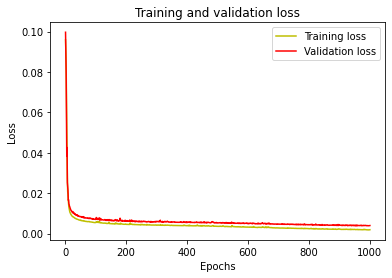

In [9]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Lets get a batch of images. We have used DataGenrator, how it generates a batch of images? using .next()

At the end of this, we will have all the batches. Each batch will contain 64 items.


In [10]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

print(len(data_batch))

3


From the list containing batches, we pick firts batch and do predictions.

In [11]:
predicted = model.predict(data_batch[0])  #Predict on the first batch of images

2/2 [==============================] - 1s 9ms/step


Now going to predict on some random images

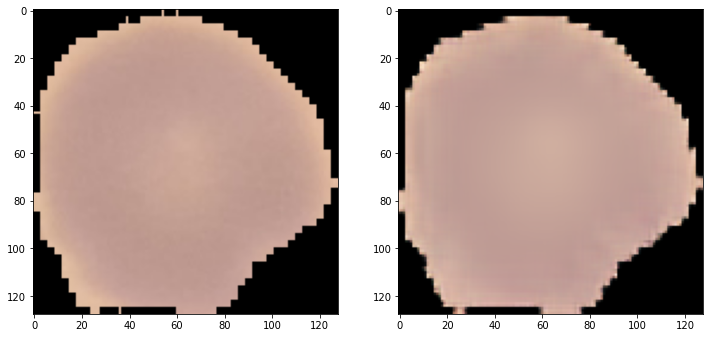

In [12]:
#view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [13]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate(validation_generator)
anomaly_error = model.evaluate(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

1/1 [==============================] - 1s 839ms/step - loss: 0.0063 - mse: 0.0063
Recon. error for the validation (normal) data is:  [0.003954618703573942, 0.003954618703573942]
Recon. error for the anomaly data is:  [0.006265741772949696, 0.006265741772949696]


In [14]:
def check_anomaly(img_path):
    
    reconstruction_error_threshold = 0.0045 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    #encoded_img = encoder_model.predict([[img]]) 
    #encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    #density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        
    else:
        print("The image is NOT an anomaly")

In [15]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob('/content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Infected/images/*')
uninfected_file_paths = glob.glob('/content/drive/MyDrive/DeepLearning/4--AutoEncoder/Malaria dataset/Uninfected_train/images/*')

1/1 [==============================] - 1s 620ms/step - loss: 0.0066 - mse: 0.0066
The image is an anomaly


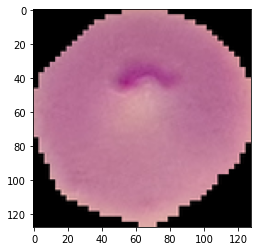

In [16]:
#Anomaly image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(para_file_paths[num])

1/1 [==============================] - 0s 15ms/step - loss: 0.0045 - mse: 0.0045
The image is an anomaly


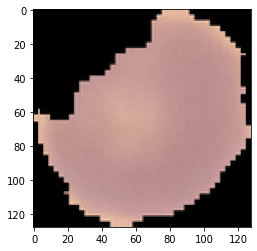

In [17]:

#Good/normal image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(uninfected_file_paths[num])